# Examples
### 1
Apply a production to a graph.

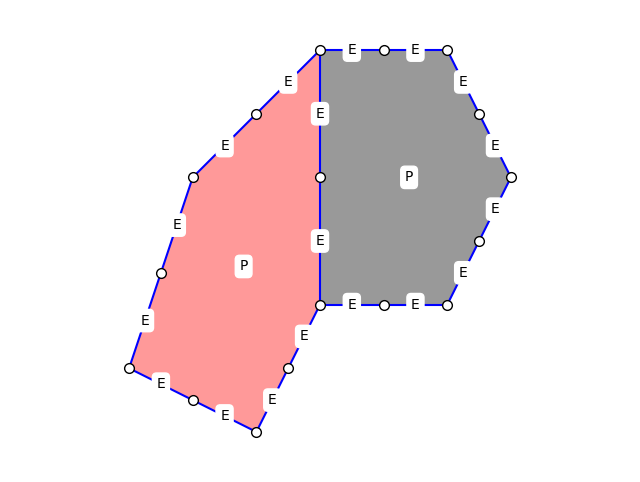

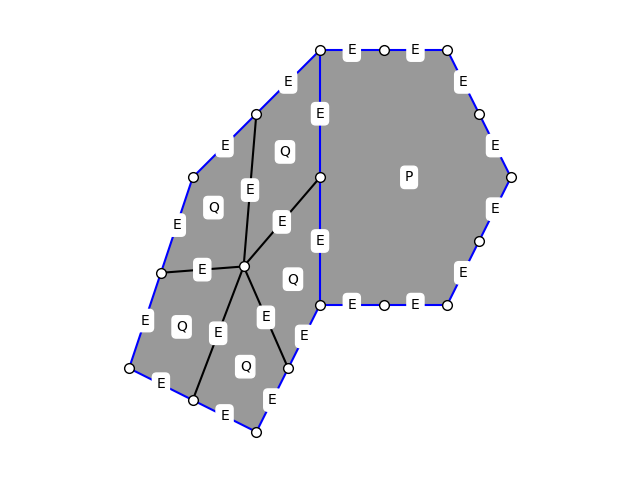

In [1]:
import matplotlib.pyplot as plt
from hypergrammar.hypergraph import Hypergraph
from hypergrammar.edge import Edge, EdgeType
from hypergrammar.productions.prod_8 import Prod8

def get_midpoint_name(v1, v2):
    s = sorted([v1, v2])
    return f"M_{s[0]}_{s[1]}"

def add_broken_edge(hg, v1, v2, coords):
    mid_name = get_midpoint_name(v1, v2)
    existing_verts = [v for edge in hg.get_edges() for v in edge.get_vertices()]

    if mid_name not in existing_verts:
        p1 = coords[v1]
        p2 = coords[v2]
        hg.set_vertex_parameter(mid_name, {
            "x": (p1["x"] + p2["x"]) / 2,
            "y": (p1["y"] + p2["y"]) / 2
        })

    e1 = Edge(EdgeType.E, frozenset({v1, mid_name}), {"R": 0, "B": 1})
    e2 = Edge(EdgeType.E, frozenset({mid_name, v2}), {"R": 0, "B": 1})

    current_edges = list(hg.get_edges())
    if not any(e.get_vertices() == e1.get_vertices() for e in current_edges):
        hg.add_edge(e1)
    if not any(e.get_vertices() == e2.get_vertices() for e in current_edges):
        hg.add_edge(e2)

hg = Hypergraph()

coords = {
    "V1": {"x": 0.0, "y": 2.0}, "V2": {"x": 2.0, "y": 4.0},
    "V3": {"x": 2.0, "y": 0.0}, "V4": {"x": 1.0, "y": -2.0},
    "V5": {"x": -1.0, "y": -1.0},
    "V6": {"x": 4.0, "y": 4.0}, "V7": {"x": 5.0, "y": 2.0},
    "V8": {"x": 4.0, "y": 0.0},
}

for v, c in coords.items():
    hg.set_vertex_parameter(v, c)

p1_corners = ["V1", "V2", "V3", "V4", "V5"]
p2_corners = ["V2", "V6", "V7", "V8", "V3"]

for i in range(5):
    add_broken_edge(hg, p1_corners[i], p1_corners[(i + 1) % 5], coords)
for i in range(5):
    add_broken_edge(hg, p2_corners[i], p2_corners[(i + 1) % 5], coords)

hg.add_edge(Edge(EdgeType.P, frozenset(p1_corners), {"R": 1, "B": 0}))
hg.add_edge(Edge(EdgeType.P, frozenset(p2_corners), {"R": 0, "B": 0}))

plt.figure(figsize=(8, 6))
hg.draw(use_positional_parameters=True)

prod8 = Prod8()
new_hg = prod8.apply(hg)

if new_hg:
    plt.figure(figsize=(8, 6))
    new_hg.draw(use_positional_parameters=True)

    new_hg_2 = prod8.apply(new_hg)
    
    if new_hg_2:
        plt.figure(figsize=(8, 6))
        new_hg_2.draw(use_positional_parameters=True)